## Gathering Data

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
from IPython.display import clear_output
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# download tsv file from Udacity's server using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [2]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
consumer_key = 'MY CONSUMER KEY'
consumer_secret = 'MY CONSUMER SECRET'
access_token = 'MY ACCESS TOKEN'
access_secret = 'MY ACCESS SECRET'

In [9]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)

In [16]:
error_list = list()
query_success_count = 0
for tweet_id in twitter_archive.tweet_id[:]:
    try:
        # get the start time of query
        start_time = time.time()
        # query each id using get_status
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        # open the tweet_json.txt file in append mode
        with open('tweet_json_test1.txt', 'a') as file:
            # write each tweet's JSON data in a new line
            file.write(json.dumps(tweet) + '\n')
        # count the number of success in querying the status and recording its data
        query_success_count += 1
        # get the end time of query
        end_time = time.time()
        clear_output()
        print('Query for id {} successful. Time taken (s): {}'.format(tweet_id, end_time-start_time))
    except Exception as e:
        # record exceptions in a list of dictionaries
        error_list.append({'tweet_id': int(tweet_id), 'error': e})
        clear_output()
        print('Query for id {} unsuccessful. Error recorded in error_list'.format(tweet_id))
clear_output()
print('Query completed.')

In [16]:
query_success_count

2345

In [4]:
# create an empty list
df_list = list()
# read the .txt file, line by line, and append the json data in each line to the list
with open('tweet_json.txt') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        tweet_id = json_data['id']
        fav_count = json_data['favorite_count']
        ret_count = json_data['retweet_count']
        df_list.append({'tweet_id': int(tweet_id),
                        'favorite_count': int(fav_count),
                        'retweet_count': int(ret_count)})

# create a pandas DataFrame using the list
df = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38835,8598
1,892177421306343426,33263,6318
2,891815181378084864,25061,4192
3,891689557279858688,42211,8713
4,891327558926688256,40360,9485


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [19]:
# save the dataframe to a csv file
df.to_csv('fav_ret_count.csv', index=False)

In [20]:
# convert the list of exceptions into a dataframe
error_df = pd.DataFrame(error_list, columns = ['tweet_id', 'error'])
error_df

,tweet_id,error
0,888202515573088257,"[{'code': 144, 'message': 'No status found wit..."
1,873697596434513921,"[{'code': 144, 'message': 'No status found wit..."
2,869988702071779329,"[{'code': 144, 'message': 'No status found wit..."
3,866816280283807744,"[{'code': 144, 'message': 'No status found wit..."
4,861769973181624320,"[{'code': 144, 'message': 'No status found wit..."
5,845459076796616705,"[{'code': 144, 'message': 'No status found wit..."
6,842892208864923648,"[{'code': 144, 'message': 'No status found wit..."
7,837012587749474308,"[{'code': 144, 'message': 'No status found wit..."
8,827228250799742977,"[{'code': 144, 'message': 'No status found wit..."
9,802247111496568832,"[{'code': 144, 'message': 'No status found wit..."


In [27]:
# save the exceptions dataframe to a csv file
error_df.to_csv('query_errors.csv', index=False)

## Assessing Data: Iteration 1

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
fav_retweet_counts = pd.read_csv('fav_ret_count.csv')

In [5]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
twitter_archive[twitter_archive.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [8]:
twitter_archive[twitter_archive.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [12]:
twitter_archive.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [9]:
sum(twitter_archive.duplicated())

0

In [20]:
twitter_archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [21]:
twitter_archive.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [22]:
twitter_archive.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [23]:
twitter_archive.puppo.unique()

array(['None', 'puppo'], dtype=object)

In [25]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [3]:
twitter_archive[twitter_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [23]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
sum(image_predictions.duplicated())

0

In [10]:
fav_retweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [13]:
sum(fav_retweet_counts.duplicated())

0

### Tidiness

- duplicated data in the form of retweets in the `twitter_archive` table
- one variable (dog stage) in 4 columns (doggo, floofer, pupper, puppo) in `twitter_archive` table
- `fav_retweet_counts` table might also contain data of retweets
- `fav_retweet_counts` should be part of the `twitter_archive` table
- `image_predictions` should be part of the `twitter_archive` table

### Quality
#### *twitter_archive* table

- timestamp and retweeted_status_timestamp are in strings format instead of datetime
- rows with NaN values in expanded_url column do not have images
- some tweets have been deleted (recorded in `query_errors.csv`)
- values in the source column contain html tags

## Cleaning Data

In [3]:
twitter_archive_clean = twitter_archive.copy()

### Tidiness
#### `twitter_archive`: duplicated data in the form of retweets

##### Define

Drop the rows with non-null values in `retweeted_status_id` column. Afterwards, drop the `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns.

##### Code (drop rows with non-null values)

In [4]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

##### Test

In [5]:
twitter_archive_clean.retweeted_status_id.notnull().sum()

0

##### Code (drop `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns)

In [6]:
twitter_archive_clean.drop(columns=['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'],
                           inplace=True)

##### Test

In [7]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### `twitter_archive`: one variable (dog stage) in 4 columns (doggo, floofer, pupper, puppo)
##### Define

Create a `dog_stage` column by extracting the terms doggo, floofer, pupper, and puppo from the `text` column. Drop the doggo, floofer, pupper, puppo columns.

##### Code

In [8]:
# use extract method to create a dog_stage column
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [9]:
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'],
                           inplace=True)

##### Test

In [10]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


In [11]:
twitter_archive_clean.dog_stage.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

#### `fav_retweet_counts`: should be part of `twitter_archive` table; possible duplicates in the form of retweets

##### Define

Merge `twitter_archive` table with `fav_retweet_counts` table using inner merge. `twitter_archive` does not contain retweet data, while `fav_retweet_counts` does not contain missing/deleted tweets. By using an inner merge, retweet data from `fav_retweet_counts` and deleted tweets in `twitter_archive` will not be included in the merged table.

##### Code

In [12]:
twitter_archive_clean = pd.merge(twitter_archive_clean, fav_retweet_counts, on='tweet_id', how='inner')

##### Test

In [13]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,38835,8598
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33263,6318
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25061,4192
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42211,8713
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,40360,9485


In [14]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
favorite_count           2175 non-null int64
retweet_count            2175 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 237.9+ KB


#### `image_predictions` should be part of the `twitter_archive` table

##### Define

Merge `image_predictions` table with `twitter_archive` table using inner merge

##### Code

In [15]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions, on='tweet_id', how='inner')

##### Test

In [16]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                326 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994

In [17]:
# set panda's option to display all 24 columns
pd.set_option('display.max_columns', 24)

twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,38835,8598,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33263,6318,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25061,4192,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42211,8713,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,40360,9485,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Quality
#### `twitter_archive`: rows with NaN values in expanded_urls column do not have images

##### Define

Drop rows with NaN values in expanded_urls column

##### Code

In [18]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

##### Test

In [19]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                326 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994

#### `twitter_archive`: incorrect data type for `timestamp` column

##### Define

Convert `timestamp` data from strings to datetime objects.

##### Code

In [20]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [21]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,38835,8598,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33263,6318,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25061,4192,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42211,8713,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,40360,9485,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [22]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                326 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf              

#### `twitter_archive`: html tags are present in `source` column

##### Define

Remove html tags using regular expression and the str.replace() method

##### Code

In [23]:
twitter_archive_clean.source = twitter_archive_clean.source.str.replace(r'<[^>]*>', '')

##### Test

In [24]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

## Assessing Data: Iteration 2

In [25]:
twitter_archive_clean.rating_numerator.value_counts()

12      450
10      419
11      396
13      261
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [26]:
twitter_archive_clean.rating_denominator.value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

Some ratings do not have a denominator of 10. Proceed to check rows with a denominator that is not 10.

In [27]:
# temporarily set column width to 1000 to see the full text
pd.set_option('display.max_colwidth', 1000)
twitter_archive_clean.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
323,820690176645140481,NaN,NaN,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,NaN,13262,3622,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
385,810984652412424192,NaN,NaN,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,NaN,5825,1609,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
662,758467244762497024,NaN,NaN,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,NaN,5203,2473,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
800,740373189193256964,NaN,NaN,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,NaN,37169,14629,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
848,731156023742988288,NaN,NaN,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,doggo,4094,1391,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
891,722974582966214656,NaN,NaN,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,NaN,4387,1716,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
925,716439118184652801,NaN,NaN,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,NaN,2518,240,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
946,713900603437621249,NaN,NaN,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,pupper,3016,812,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
970,710658690886586372,NaN,NaN,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade o

- Row 385 does not have a rating. The '24/7' in the text is not a rating
- In some rows where there are more than one occurence of numbers in the format 'dd/dd', the first occurence is extracted as rating regardless of whether it truly is one.

In [28]:
# check the text of rows containing more than one occurence of numbers in the format 'dd/dd'
twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\/\d+\D+\d+\/\d+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
555,777684233540206592,NaN,NaN,2016-09-19 01:42:24,Twitter for iPhone,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,None,NaN,12244,3301,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
749,747600769478692864,NaN,NaN,2016-06-28 01:21:27,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,NaN,2500,602,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
800,740373189193256964,NaN,NaN,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,NaN,37169,14629,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
891,722974582966214656,NaN,NaN,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,NaN,4387,1716,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
925,716439118184652801,NaN,NaN,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,NaN,2518,240,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
941,714258258790387713,NaN,NaN,2016-03-28 01:10:13,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10,10,Travis,NaN,3209,783,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1062,703356393781329922,NaN,NaN,2016-02-26 23:10:06,Twitter for iPhone,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9,10,Socks,NaN,2041,423,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
1152,695064344191721472,NaN,NaN,2016-02-04 02:00:27,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,None,NaN,1722,658,https://pbs.twimg.com/ext_tw_video_thumb/695064251149508610/pu/img/0OPED0aUurb9Z16a.jpg,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False
1157,694352839993344000,NaN,NaN,2016-02-02 02:53:12,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has 

Rows where the ratings are incorrectly extracted:

- 800: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
- 891: Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
- 925: This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
- 1328: This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5	
- 1973: This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv	

In [29]:
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

Inaccurate names such as 'None', 'such', 'a', 'quite', 'O'.

In [30]:
sum(twitter_archive_clean.name == 'None')

546

In [31]:
none_names = twitter_archive_clean.query('name == "None"')
none_names.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
419,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,6930,1532,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True
1350,681610798867845120,NaN,NaN,2015-12-28 23:00:52,Twitter for iPhone,*collapses* 12/10 https://t.co/C7M8mnzHIK,https://twitter.com/dog_rates/status/681610798867845120/photo/1,12,10,None,NaN,2048,518,https://pbs.twimg.com/media/CXWRZBgWkAEHMea.jpg,1,toy_poodle,0.821704,True,miniature_poodle,0.116042,True,Yorkshire_terrier,0.014847,True
542,779377524342161408,NaN,NaN,2016-09-23 17:50:56,Twitter for iPhone,Have you ever seen such a smol pupper? Portable af. 12/10 would keep in shirt pocket https://t.co/KsqaIzlQ12,https://twitter.com/dog_rates/status/779377524342161408/video/1,12,10,None,pupper,9632,3505,https://pbs.twimg.com/ext_tw_video_thumb/779377444025499652/pu/img/eIiLDy9F6rPNarEc.jpg,1,sundial,0.170921,False,cash_machine,0.060359,False,maze,0.054981,False
1029,706291001778950144,NaN,NaN,2016-03-06 01:31:11,Twitter for iPhone,When you're just relaxin and having a swell time but then remember you have to fill out the FAFSA ...11/10 https://t.co/qy33OBcexg,"https://twitter.com/dog_rates/status/706291001778950144/photo/1,https://twitter.com/dog_rates/status/706291001778950144/photo/1",11,10,None,NaN,1818,511,https://pbs.twimg.com/media/Cc0_2tXXEAA2iTY.jpg,1,Border_terrier,0.587101,True,bull_mastiff,0.164087,True,Staffordshire_bullterrier,0.105011,True
1564,674271431610523648,NaN,NaN,2015-12-08 16:56:51,Twitter for iPhone,"""AT DAWN, WE RIDE""\n10/10 for both dogs https://t.co/3aXX6wH6it",https://twitter.com/dog_rates/status/674271431610523648/photo/1,10,10,None,NaN,1638,777,https://pbs.twimg.com/media/CVt-SeMWwAAs9HH.jpg,1,German_shepherd,0.991454,True,malinois,0.004150,True,bloodhound,0.003019,True
292,826240494070030336,NaN,NaN,2017-01-31 01:27:39,Twitter for iPhone,We only rate dogs. Please don't send in any more non-dogs like this Wild Albanian Street Moose. Thank you... 11/10 https://t.co/srXL2s868C,https://twitter.com/dog_rates/status/826240494070030336/photo/1,11,10,None,NaN,14330,2889,https://pbs.twimg.com/media/C3dlVMbXAAUd-Gh.jpg,1,French_bulldog,0.903048,True,pug,0.096242,True,Boston_bull,0.000234,True
91,870804317367881728,NaN,NaN,2017-06-03 00:48:22,Twitter for iPhone,Real funny guys. Sending in a pic without a dog in it. Hilarious. We'll rate the rug tho because it's giving off a very good vibe. 11/10 https://t.co/GCD1JccCyi,https://twitter.com/dog_rates/status/870804317367881728/photo/1,11,10,None,NaN,33929,6368,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,1,home_theater,0.168290,False,sandbar,0.098040,False,television,0.079729,False
1440,677662372920729601,NaN,NaN,2015-12-18 01:31:14,Twitter for iPhone,"In honor of the new Star Wars movie. Here's Yoda pug. 12/10 pet really well, would I https://t.co/pvjdRn00XH",https://twitter.com/dog_rates/status/677662372920729601/photo/1,12,10,None,NaN,2078,1064,https://pbs.twimg.com/media/CWeKTZTWsAA5R3Z.jpg,1,cowboy_hat,0.256110,False,trench_coat,0.127086,False,cloak,0.071439,False
544,779056095788752897,NaN,NaN,2016-09-22 20:33:42,Twitter for iPhone,Everybody drop what you're doing and look at this dog. 13/10 must be super h*ckin rare https://t.co/I1bJUzUEW5,"https://twitter.com/dog_rates/status/779056095788752897/photo/1,https://twitter.com/dog_rates/status/779056095788752897/photo/1",13,10,None,NaN,16144,5086,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True
1658,672231046314901505

In [32]:
# check whether any rows with 'None' in the name column contain the string 'name is' or 'named'
none_names[none_names.text.str.contains('name is|named')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
134,859607811541651456,NaN,NaN,2017-05-03 03:17:27,Twitter for iPhone,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,https://twitter.com/dog_rates/status/859607811541651456/photo/1,13,10,None,puppo,19110,1653,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True
1342,682047327939461121,NaN,NaN,2015-12-30 03:55:29,Twitter for iPhone,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10,10,None,NaN,3441,1063,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
1395,679736210798047232,NaN,NaN,2015-12-23 18:51:56,Twitter for iPhone,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9,10,None,NaN,2241,882,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,1,French_bulldog,0.319139,True,Chihuahua,0.154088,True,Cardigan,0.117688,True
1809,669363888236994561,NaN,NaN,2015-11-25 03:56:01,Twitter for iPhone,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,https://twitter.com/dog_rates/status/669363888236994561/photo/1,10,10,None,NaN,651,242,https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg,1,golden_retriever,0.539004,True,Irish_setter,0.406550,True,cocker_spaniel,0.041484,True
1868,668268907921326080,NaN,NaN,2015-11-22 03:24:58,Twitter for iPhone,Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner. 10/10 stays alert https://t.co/aeZykWwiJN,https://twitter.com/dog_rates/status/668268907921326080/photo/1,10,10,None,NaN,574,251,https://pbs.twimg.com/media/CUYrBNQUkAA-zx4.jpg,1,Pembroke,0.484830,True,Cardigan,0.425303,True,basenji,0.014753,True
1906,667524857454854144,NaN,NaN,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12,10,None,NaN,1750,1167,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
1908,667509364010450944,NaN,NaN,2015-11-20 01:06:48,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12,10,None,NaN,6989,2215,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True


- Most rows with 'None' in the name column has no name in the `text` column
- In some rows, the `text` column contains the dog's name in the text after the phrase 'name is' or 'named' but are not extracted correctly

In [33]:
# check the row where the name is 'O'
twitter_archive_clean.query('name == "O"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
561,776201521193218049,NaN,NaN,2016-09-14 23:30:38,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,NaN,10452,2822,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True


- In this row, the dog's name is O'Malley instead of O

In [34]:
# check the names of the dogs that are in lowercase and the number of occurence
lowercase_names = twitter_archive_clean[twitter_archive_clean.name.apply(lambda x: x.islower())]
lowercase_names.name.value_counts()

a               55
the              7
an               6
one              4
very             4
just             3
quite            3
getting          2
actually         1
incredibly       1
this             1
officially       1
infuriating      1
not              1
all              1
his              1
light            1
by               1
space            1
unacceptable     1
my               1
such             1
Name: name, dtype: int64

In [35]:
lowercase_names.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
746,747885874273214464,NaN,NaN,2016-06-28 20:14:22,Twitter for iPhone,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,NaN,3179,1093,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1,kuvasz,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True
848,731156023742988288,NaN,NaN,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,doggo,4094,1391,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
1991,666033412701032449,NaN,NaN,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,NaN,125,44,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1987,666051853826850816,NaN,NaN,2015-11-16 00:35:11,Twitter for iPhone,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,NaN,1229,854,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
1972,666293911632134144,NaN,NaN,2015-11-16 16:37:02,Twitter for iPhone,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,https://twitter.com/dog_rates/status/666293911632134144/photo/1,3,10,a,NaN,511,357,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
1209,690360449368465409,NaN,NaN,2016-01-22 02:28:52,Twitter for iPhone,Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx,https://twitter.com/dog_rates/status/690360449368465409/photo/1,9,10,the,NaN,2852,977,https://pbs.twimg.com/media/CZSnKw8WwAAAN7q.jpg,1,pug,0.686933,True,French_bulldog,0.076359,True,Brabancon_griffon,0.035007,True
1853,668614819948453888,NaN,NaN,2015-11-23 02:19:29,Twitter for iPhone,Here is a horned dog. Much grace. Can jump over moons (dam!). Paws not soft. Bad at barking. 7/10 can still pet tho https://t.co/2Su7gmsnZm,https://twitter.com/dog_rates/status/668614819948453888/photo/1,7,10,a,NaN,633,333,https://pbs.twimg.com/media/CUdloW8WEAAxB_Y.jpg,1,bustard,0.380772,False,pelican,0.100554,False,crane,0.084713,False
1275,685943807276412928,NaN,NaN,2016-01-09 21:58:42,Twitter for iPhone,This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn,https://twitter.com/dog_rates/status/685943807276412928/video/1,8,10,the,pupper,1757,674,https://pbs.twimg.com/ext_tw_video_thumb/685943751555051520/pu/img/rlBvQWaFPUMx1MTi.jpg,1,papillon,0.200812,True,toy_terrier,0.114512,True,Cardigan,0.094520,True
929,715733265223708672,NaN,NaN,2016-04-01 02:51:22,Twitter for iPhone,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,https://twitter.com/dog_rates/status/715733265223708672/photo/1,10,10,a,NaN,4973,1855,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,1

In [36]:
lowercase_names[lowercase_names.text.str.contains('name is|named')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
622,765395769549590528,NaN,NaN,2016-08-16 03:52:26,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,my,NaN,28571,3779,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,Pembroke,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,3.887490e-02,True
1503,675706639471788032,NaN,NaN,2015-12-12 15:59:51,Twitter for iPhone,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,NaN,679,103,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,1,English_springer,0.990300,True,Welsh_springer_spaniel,0.002080,True,cocker_spaniel,2.013780e-03,True
1600,673636718965334016,NaN,NaN,2015-12-06 22:54:44,Twitter for iPhone,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,NaN,1169,394,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,1,wombat,0.880257,False,corn,0.019421,False,pug,1.904430e-02,True
1679,671743150407421952,NaN,NaN,2015-12-01 17:30:22,Twitter for iPhone,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,a,NaN,765,240,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,1,toy_poodle,0.419427,True,miniature_poodle,0.237067,True,swing,1.041930e-01,False
1710,671147085991960577,NaN,NaN,2015-11-30 02:01:49,Twitter for iPhone,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,a,NaN,698,242,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,1,Yorkshire_terrier,0.467202,True,cairn,0.440122,True,silky_terrier,5.869010e-02,True
1760,670427002554466305,NaN,NaN,2015-11-28 02:20:27,Twitter for iPhone,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,a,NaN,537,174,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,1,seat_belt,0.952258,False,toy_terrier,0.038872,True,beagle,3.226440e-03,True
1769,670361874861563904,NaN,NaN,2015-11-27 22:01:40,Twitter for iPhone,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9,10,a,NaN,340,71,https://pbs.twimg.com/media/CU2akCQWsAIbaOV.jpg,1,platypus,0.974075,False,spotted_salamander,0.011068,False,bison,3.896910e-03,False
1772,670303360680108032,NaN,NaN,2015-11-27 18:09:09,Twitter for iPhone,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,a,NaN,442,143,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,1,Shetland_sheepdog,0.380278,True,Cardigan,0.342806,True,guinea_pig,1.562490e-01,False
1790,669923323644657664,NaN,NaN,2015-11-26 16:59:01,Twitter for iPhone,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10,10,a,NaN,245,61,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,1,car_mirror,0.

- In some rows, the `text` column contains the dog's name in the text after the phrase 'name is' or 'named' but are not extracted correctly

In [37]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('name is|named')].name.value_counts()

a        20
None      7
Lugan     1
my        1
an        1
Name: name, dtype: int64

- Seemingly, all except one of the rows that contains the phrase 'name is' or 'named' have the dog names incorrectly extracted

In [38]:
# check the row that contains the phrase 'name is' or 'named', but has the name Lugan
twitter_archive_clean[twitter_archive_clean.text.str.contains('Lugan')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1951,666739327293083650,NaN,NaN,2015-11-17 22:06:57,Twitter for iPhone,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10,10,Lugan,NaN,240,67,https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg,1,miniature_poodle,0.546933,True,cocker_spaniel,0.165255,True,toy_poodle,0.095959,True


- In row 2132, the `text` column contains the phrase 'name is' or 'named', but the dog name is correctly extracted so it should be excluded from the cleaning process

### Quality

#### `twitter_archive` table:

- Row 385 does not have a rating. The '24/7' in the text is not a rating
- The texts in rows 800, 891, 925, 1328, and 1973 have two occurences of numbers in the format 'dd/dd'. The first occurence is extracted as rating, but the actual rating is in the second occurence
- Inaccurate names such as 'None', 'such', 'a', 'quite', 'not', 'one', 'O', 'very', 'an', 'all', 'by', 'light'
    - Row 561: O'Malley is incorrectly extracted as 'O'
- All except one of the rows that contains the phrase 'name is' or 'named' have the dog names incorrectly extracted
- Most rows with 'None' in the name column has no name in the `text` column

## Cleaning Data: Iteration 2

### Quality

#### `twitter_archive`: Row 385 does not have a rating. The '24/7' in the text is not a rating

##### Define

Change the rating numerator and denominator to 0

##### Code

In [39]:
twitter_archive_clean.at[385, 'rating_numerator'] = 0
twitter_archive_clean.at[385, 'rating_denominator'] = 0

##### Test

In [40]:
twitter_archive_clean.query('index == 385')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
385,810984652412424192,NaN,NaN,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",0,0,Sam,NaN,5825,1609,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True


#### `twitter_archive`: In rows 800, 891, 925, 1328, and 1973, where there are more than one occurence of numbers in the format 'dd/dd', the first occurence is extracted even though it is not a rating.

##### Define

Find the second occurence of numbers in 'dd/dd' format and get the numerator and denominator using regular expressions and the re library.

##### Code

In [41]:
for i in [800, 891, 925, 1328, 1973]:
    text = twitter_archive_clean.at[i, 'text']
    numer = re.findall(r'\d+\/\d+\D+(\d+)\/\d+', text)[0]
    denom = re.findall(r'\d+\/\d+\D+\d+\/(\d+)', text)[0]
    twitter_archive_clean.at[i, 'rating_numerator'] = int(numer)
    twitter_archive_clean.at[i, 'rating_denominator'] = int(denom)

In [42]:
twitter_archive_clean.query('index in [800, 891, 925, 1328, 1973]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
800,740373189193256964,NaN,NaN,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,None,NaN,37169,14629,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
891,722974582966214656,NaN,NaN,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,None,NaN,4387,1716,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
925,716439118184652801,NaN,NaN,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,NaN,2518,240,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1328,682962037429899265,NaN,NaN,2016-01-01 16:30:13,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,NaN,39754,18403,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
1973,666287406224695296,NaN,NaN,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,an,NaN,149,68,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


#### `twitter_archive`: "O'Malley" incorrectly extracted as "O" in row 625

##### Define

Change the value in the `name` column of this row to O'Malley

##### Code

In [43]:
twitter_archive_clean.at[561, 'name'] = "O'Malley"

##### Test

In [44]:
twitter_archive_clean.query('index == 561')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
561,776201521193218049,NaN,NaN,2016-09-14 23:30:38,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,NaN,10452,2822,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True


#### `twitter_archive`: All except one of the rows that contains the phrase 'name is' or 'named' have the dog names incorrectly extracted

##### Define

Extract the names using regular expression

##### Code

In [45]:
contains_name_is = twitter_archive_clean[twitter_archive_clean.text.str.contains('name is')]
for i in contains_name_is.index:
    try:
        text = twitter_archive_clean.at[i, 'text']
        dog_name = re.findall(r'name\s+is\s+(\w+)', text)[0]
        twitter_archive_clean.at[i, 'name'] = dog_name
    except IndexError:
        continue

##### Test

In [46]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('name is')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
134,859607811541651456,NaN,NaN,2017-05-03 03:17:27,Twitter for iPhone,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,https://twitter.com/dog_rates/status/859607811541651456/photo/1,13,10,Zoey,puppo,19110,1653,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True
622,765395769549590528,NaN,NaN,2016-08-16 03:52:26,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,Zoey,NaN,28571,3779,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,Pembroke,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,0.038875,True
1342,682047327939461121,NaN,NaN,2015-12-30 03:55:29,Twitter for iPhone,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10,10,Thea,NaN,3441,1063,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
1395,679736210798047232,NaN,NaN,2015-12-23 18:51:56,Twitter for iPhone,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9,10,Sabertooth,NaN,2241,882,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,1,French_bulldog,0.319139,True,Chihuahua,0.154088,True,Cardigan,0.117688,True
1906,667524857454854144,NaN,NaN,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12,10,Big,NaN,1750,1167,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
1926,667177989038297088,NaN,NaN,2015-11-19 03:10:02,Twitter for iPhone,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8,10,Daryl,NaN,194,57,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,1,vizsla,0.259249,True,Chesapeake_Bay_retriever,0.176293,True,Weimaraner,0.112369,True
1951,666739327293083650,NaN,NaN,2015-11-17 22:06:57,Twitter for iPhone,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10,10,Rocky,NaN,240,67,https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg,1,miniature_poodle,0.546933,True,cocker_spaniel,0.165255,True,toy_poodle,0.095959,True


- In row 1906, the name Big Jumpy Rat is not fully extracted
- In row 1951, the correct name is Lugan, not Rocky

##### Code

In [47]:
# manually assign name to row where regular expression doesn't work
twitter_archive_clean.at[1906, 'name'] = 'Big Jumpy Rat'

# change the name in row 1951 back to Lugan
twitter_archive_clean.at[1951, 'name'] = 'Lugan'

##### Test

In [48]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('name is')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
134,859607811541651456,NaN,NaN,2017-05-03 03:17:27,Twitter for iPhone,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,https://twitter.com/dog_rates/status/859607811541651456/photo/1,13,10,Zoey,puppo,19110,1653,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True
622,765395769549590528,NaN,NaN,2016-08-16 03:52:26,Twitter for iPhone,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,https://twitter.com/dog_rates/status/765395769549590528/photo/1,13,10,Zoey,NaN,28571,3779,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,Pembroke,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,0.038875,True
1342,682047327939461121,NaN,NaN,2015-12-30 03:55:29,Twitter for iPhone,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10,10,Thea,NaN,3441,1063,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
1395,679736210798047232,NaN,NaN,2015-12-23 18:51:56,Twitter for iPhone,This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP,https://twitter.com/dog_rates/status/679736210798047232/photo/1,9,10,Sabertooth,NaN,2241,882,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,1,French_bulldog,0.319139,True,Chihuahua,0.154088,True,Cardigan,0.117688,True
1906,667524857454854144,NaN,NaN,2015-11-20 02:08:22,Twitter Web Client,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,https://twitter.com/dog_rates/status/667524857454854144/photo/1,12,10,Big Jumpy Rat,NaN,1750,1167,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
1926,667177989038297088,NaN,NaN,2015-11-19 03:10:02,Twitter for iPhone,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,https://twitter.com/dog_rates/status/667177989038297088/photo/1,8,10,Daryl,NaN,194,57,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,1,vizsla,0.259249,True,Chesapeake_Bay_retriever,0.176293,True,Weimaraner,0.112369,True
1951,666739327293083650,NaN,NaN,2015-11-17 22:06:57,Twitter for iPhone,This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10,10,Lugan,NaN,240,67,https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg,1,miniature_poodle,0.546933,True,cocker_spaniel,0.165255,True,toy_poodle,0.095959,True


##### Code

In [49]:
contains_named = twitter_archive_clean[twitter_archive_clean.text.str.contains('named')]
for i in contains_named.index:
    text = twitter_archive_clean.at[i, 'text']
    dog_name = re.findall(r'named\s+(\w+)', text)[0]
    twitter_archive_clean.at[i, 'name'] = dog_name

##### Test

In [50]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('named')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1503,675706639471788032,NaN,NaN,2015-12-12 15:59:51,Twitter for iPhone,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,Wylie,NaN,679,103,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,1,English_springer,0.990300,True,Welsh_springer_spaniel,0.002080,True,cocker_spaniel,2.013780e-03,True
1600,673636718965334016,NaN,NaN,2015-12-06 22:54:44,Twitter for iPhone,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,Kip,NaN,1169,394,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,1,wombat,0.880257,False,corn,0.019421,False,pug,1.904430e-02,True
1679,671743150407421952,NaN,NaN,2015-12-01 17:30:22,Twitter for iPhone,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,Jacob,NaN,765,240,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,1,toy_poodle,0.419427,True,miniature_poodle,0.237067,True,swing,1.041930e-01,False
1710,671147085991960577,NaN,NaN,2015-11-30 02:01:49,Twitter for iPhone,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,Rufus,NaN,698,242,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,1,Yorkshire_terrier,0.467202,True,cairn,0.440122,True,silky_terrier,5.869010e-02,True
1760,670427002554466305,NaN,NaN,2015-11-28 02:20:27,Twitter for iPhone,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,Spork,NaN,537,174,https://pbs.twimg.com/media/CU3VzVwWwAAAsst.jpg,1,seat_belt,0.952258,False,toy_terrier,0.038872,True,beagle,3.226440e-03,True
1769,670361874861563904,NaN,NaN,2015-11-27 22:01:40,Twitter for iPhone,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9,10,Cherokee,NaN,340,71,https://pbs.twimg.com/media/CU2akCQWsAIbaOV.jpg,1,platypus,0.974075,False,spotted_salamander,0.011068,False,bison,3.896910e-03,False
1772,670303360680108032,NaN,NaN,2015-11-27 18:09:09,Twitter for iPhone,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,Hemry,NaN,442,143,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,1,Shetland_sheepdog,0.380278,True,Cardigan,0.342806,True,guinea_pig,1.562490e-01,False
1790,669923323644657664,NaN,NaN,2015-11-26 16:59:01,Twitter for iPhone,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10,10,Alphred,NaN,245,61,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg,1,car_mirror,0.343063,False,seat_belt,0.110289,False,wing,8.014850e-02,False
1804,669564461267722241,NaN,NaN,2015-11-25 17:13:02,Twitter for iPhone,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10,10,Alfredo,NaN,401,130,https://pbs.twimg.com/media/

#### `twitter_archive`: Most rows with 'None' in the name column has no name in the text column

##### Define

Convert 'None' to NaN in the `name` column

##### Code

In [51]:
twitter_archive_clean.name = twitter_archive_clean.name.replace('None', np.nan)

##### Test

In [52]:
twitter_archive_clean.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Assessing Data: Iteration 3

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1455 non-null object
dog_stage                326 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf              

- `dog_stage` should be in categorical format instead of object

## Cleaning Data: Iteration 3

#### `dog_stage` should be in categorical format instead of object

##### Define

Convert `dog_stage` to categorical format

##### Code

In [54]:
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

##### Test

In [55]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1455 non-null object
dog_stage                326 non-null category
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf            

## Storing Cleaned Data

In [56]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analysis and Visualisation

In [2]:
pd.set_option('display.max_columns', 24)
# read the stored csv files
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,38835,8598,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33263,6318,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25061,4192,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42211,8713,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,40360,9485,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [3]:
df.timestamp = pd.to_datetime(df.timestamp)
df.dog_stage = df.dog_stage.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1455 non-null object
dog_stage                326 non-null category
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf            

### Univariate Analysis

#### Distribution of favorite count

In [8]:
df.favorite_count.describe()

count      1994.000000
mean       8856.916249
std       12575.318541
min          79.000000
25%        1929.000000
50%        4048.500000
75%       11158.500000
max      143505.000000
Name: favorite_count, dtype: float64

In [21]:
# set the grid style to dark grid
sns.set_style('darkgrid')
# set the size of figures to 10 inches by 6 inches
plt.rcParams['figure.figsize'] = (12, 8)
# set the font size of axis labels to 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14

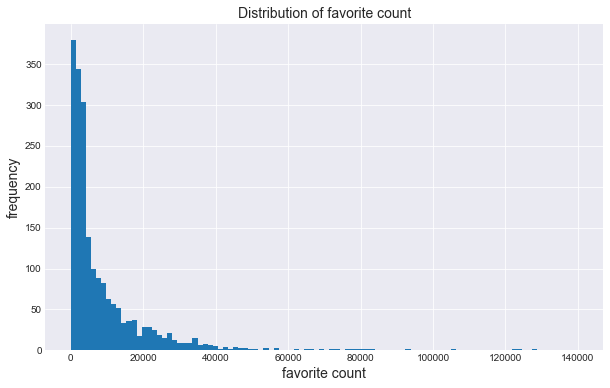

In [7]:
bin_boundaries = np.linspace(0,140000, 101)
plt.hist(df.favorite_count, bins=bin_boundaries)
plt.xlabel('favorite count')
plt.ylabel('frequency')
plt.title('Distribution of favorite count');

Favorite count data appear heavily right skewed.

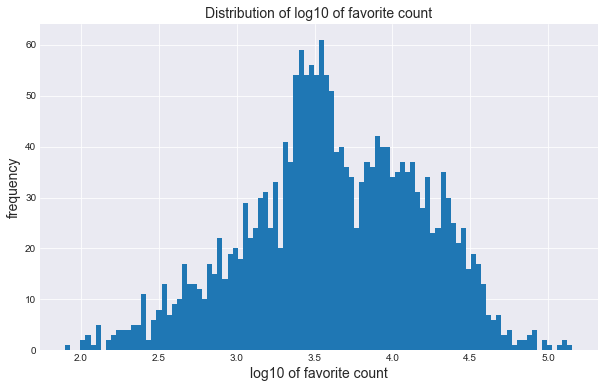

In [8]:
log_favorite = df['favorite_count'].apply(lambda x: np.log10(x))
plt.hist(log_favorite, bins=100)
plt.xlabel('log10 of favorite count')
plt.ylabel('frequency')
plt.title('Distribution of log10 of favorite count');

log10 of favorite count appear somewhat normally distributed.

#### Distribution of retweet count

In [9]:
df.retweet_count.describe()

count     1994.000000
mean      2719.892678
std       4696.166270
min         13.000000
25%        608.250000
50%       1313.000000
75%       3128.500000
max      77425.000000
Name: retweet_count, dtype: float64

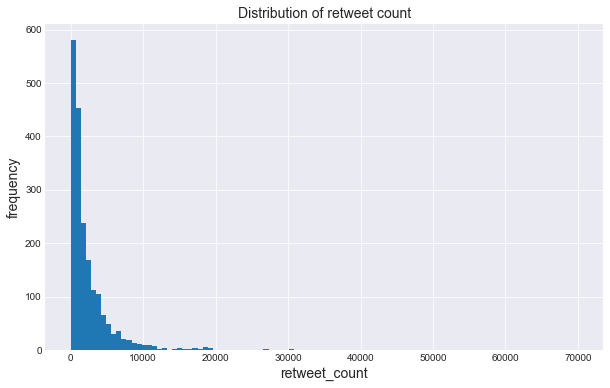

In [10]:
plt.hist(df.retweet_count, bins=np.linspace(0,70000, 101))
plt.xlabel('retweet_count')
plt.ylabel('frequency')
plt.title('Distribution of retweet count');

Similar to favorite count, retweet count data appear heavily right skewed.

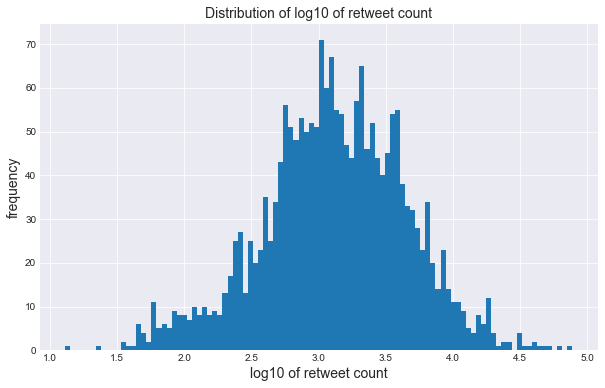

In [6]:
log_retweet = df['retweet_count'].apply(lambda x: np.log10(x))
plt.hist(log_retweet, bins=100)
plt.xlabel('log10 of retweet count')
plt.ylabel('frequency')
plt.title('Distribution of log10 of retweet count');

log10 of retweet count appear somewhat normally distributed.

### Bivariate Analysis

#### Favorite count over time

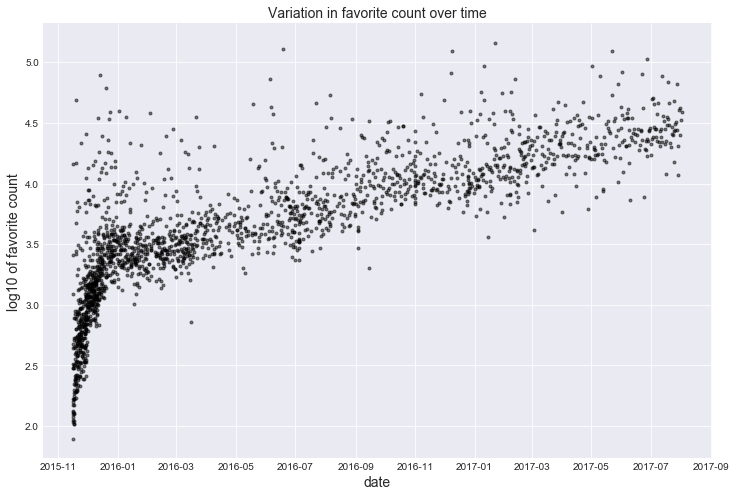

In [37]:
# import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot_date(df.timestamp, log_favorite, alpha=0.5, ms=3, c='black')
plt.xlabel('date')
plt.ylabel('log10 of favorite count')
plt.title('Variation in favorite count over time');
#ax.xaxis.set_major_locator(mdates.MonthLocator())
#fig.autofmt_xdate();

#### Retweet count over time

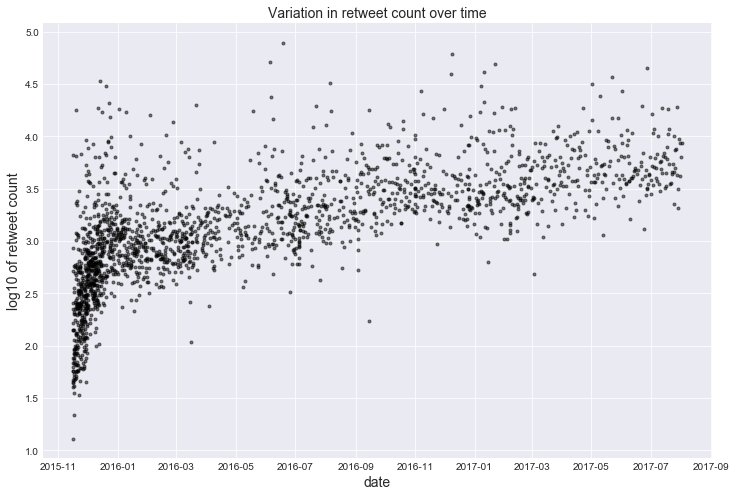

In [39]:
plt.plot_date(df.timestamp, log_retweet, alpha=0.5, ms=3, c='black')
plt.xlabel('date')
plt.ylabel('log10 of retweet count')
plt.title('Variation in retweet count over time');

## References

- Convert Tweepy Status Object into JSON https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json
- The structure of the Status object of Tweepy
 https://gist.github.com/dev-techmoe/ef676cdd03ac47ac503e856282077bf2
- Twitter API - get tweets with specific id
 https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- Tweepy documentation http://tweepy.readthedocs.io/en/v3.5.0/index.html
- Reading and Writing JSON to a File in Python http://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- Clear cell output in a loop https://stackoverflow.com/questions/24816237/ipython-notebook-clear-cell-output-in-code
- Use astype() when NaN is present in pandas series https://stackoverflow.com/questions/41550746/error-using-astype-when-nan-exists-in-a-dataframe
- Select part of the string in a column
    - https://stackoverflow.com/questions/11350770/pandas-dataframe-select-by-partial-string
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html
- Set options https://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html#pandas.set_option
- Set value for one cell https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
- Regular expression operations https://docs.python.org/3/library/re.html
- Customize matplotlib using rcParams
    - https://www.youtube.com/watch?v=hJI0wZV7VnA
    - https://matplotlib.org/users/customizing.html
- Set binwidth in matplotlib using numpy.linspace()
    - https://stackoverflow.com/questions/28101623/python-pyplot-histogram-adjusting-bin-width-not-number-of-bins/28101842
    - https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
- Plot datetime in scatterplots 
    - https://stackoverflow.com/questions/33676608/pandas-type-error-trying-to-plot
    - https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot_date.html